Pseudo labelling and splitting data by angle

In [83]:
%load_ext autoreload
%autoreload 2

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pdb
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras import backend as K
from matplotlib import pyplot as plt
%matplotlib inline
import scipy
from scipy import misc, ndimage
from scipy.ndimage.interpolation import zoom
from scipy.ndimage import imread
import helpers
from models import DaveModel, DaveVGG, DaveVGG19, SimpleModel, LeNetModel
from trainer import Trainer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
train = pd.read_json("_RawData/train.json/data/processed/train.json")
test = pd.read_json("_RawData/test.json/data/processed/test.json")

In [3]:
X = helpers.get_images(train)

In [4]:
y = to_categorical(train.is_iceberg.values,num_classes=2)

In [5]:
Xtr, Xv, ytr, yv = train_test_split(X, y, shuffle=False, test_size=0.20)

In [6]:
# Create the model and compile
model = DaveModel(Xtr, ytr, Xv, yv)

In [7]:
model.train(32, 50, True)

Batch Size: 32
Epochs: 50
Epoch 1/50
41/40 [==============================] - 7s - loss: 0.5864 - acc: 0.6974 - val_loss: 0.6622 - val_acc: 0.6573
Epoch 2/50
41/40 [==============================] - 1s - loss: 0.5113 - acc: 0.7484 - val_loss: 0.6435 - val_acc: 0.6573
Epoch 3/50
41/40 [==============================] - 1s - loss: 0.4713 - acc: 0.7556 - val_loss: 0.6317 - val_acc: 0.6573
Epoch 4/50
41/40 [==============================] - 1s - loss: 0.4273 - acc: 0.7895 - val_loss: 0.6288 - val_acc: 0.6573
Epoch 5/50
41/40 [==============================] - 1s - loss: 0.3972 - acc: 0.8101 - val_loss: 0.6285 - val_acc: 0.6573
Epoch 6/50
41/40 [==============================] - 1s - loss: 0.3921 - acc: 0.8121 - val_loss: 0.6737 - val_acc: 0.6573
Epoch 7/50
41/40 [==============================] - 1s - loss: 0.3898 - acc: 0.7904 - val_loss: 0.6496 - val_acc: 0.6573
Epoch 8/50
41/40 [==============================] - 1s - loss: 0.3572 - acc: 0.8170 - val_loss: 0.7837 - val_acc: 0.6542
Epoch 

In [8]:
vgg = DaveVGG(Xtr, ytr, Xv, yv)

In [9]:
vgg.train(32, 50, True)

Batch Size: 32
Epochs: 50
Epoch 1/50
41/40 [==============================] - 8s - loss: 0.6934 - acc: 0.4803 - val_loss: 0.6938 - val_acc: 0.4891
Epoch 2/50
41/40 [==============================] - 5s - loss: 0.6898 - acc: 0.5250 - val_loss: 0.6914 - val_acc: 0.6573
Epoch 3/50
41/40 [==============================] - 5s - loss: 0.6928 - acc: 0.5131 - val_loss: 0.6859 - val_acc: 0.6573
Epoch 4/50
41/40 [==============================] - 5s - loss: 0.6913 - acc: 0.5136 - val_loss: 0.6974 - val_acc: 0.3458
Epoch 5/50
41/40 [==============================] - 5s - loss: 0.6907 - acc: 0.5509 - val_loss: 0.6939 - val_acc: 0.4611
Epoch 6/50
41/40 [==============================] - 5s - loss: 0.6782 - acc: 0.5387 - val_loss: 0.6685 - val_acc: 0.6573
Epoch 7/50
41/40 [==============================] - 5s - loss: 0.6746 - acc: 0.5125 - val_loss: 0.7023 - val_acc: 0.3551
Epoch 8/50
41/40 [==============================] - 5s - loss: 0.6729 - acc: 0.5935 - val_loss: 0.7551 - val_acc: 0.3769
Epoch 

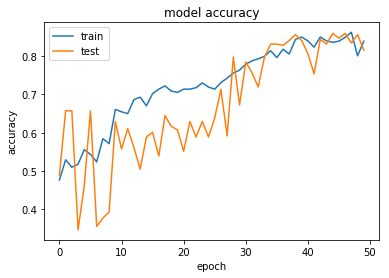

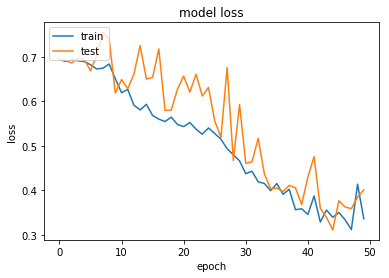

In [10]:
vgg.plot_results()

In [128]:
X_test = helpers.get_images(test)
predict = vgg.predict(X_test)
predict

array([[  3.90024602e-01,   6.09975457e-01],
       [  9.93215561e-01,   6.78448053e-03],
       [  1.00000000e+00,   7.81740126e-27],
       ..., 
       [  9.22401726e-01,   7.75983259e-02],
       [  9.18363966e-03,   9.90816355e-01],
       [  1.00000000e+00,   4.76142665e-14]], dtype=float32)

In [11]:
simple = SimpleModel(Xtr, ytr, Xv, yv)

In [12]:
simple.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_2 (Lambda)            (None, 75, 75, 3)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 73, 73, 512)       14336     
_________________________________________________________________
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 1026      
Total params: 278,018
Trainable params: 278,018
Non-trainable params: 0
_________________________________________________________________


In [13]:
simple.train(32, 50, True)

Batch Size: 32
Epochs: 50
Epoch 1/50
41/40 [==============================] - 2s - loss: 0.6852 - acc: 0.5642 - val_loss: 0.6950 - val_acc: 0.4829
Epoch 2/50
41/40 [==============================] - 1s - loss: 0.6696 - acc: 0.6283 - val_loss: 0.6732 - val_acc: 0.5639
Epoch 3/50
41/40 [==============================] - 1s - loss: 0.6565 - acc: 0.6344 - val_loss: 0.6783 - val_acc: 0.5202
Epoch 4/50
41/40 [==============================] - 1s - loss: 0.6458 - acc: 0.6493 - val_loss: 0.6668 - val_acc: 0.5639
Epoch 5/50
41/40 [==============================] - 1s - loss: 0.6383 - acc: 0.6658 - val_loss: 0.6581 - val_acc: 0.5826
Epoch 6/50
41/40 [==============================] - 1s - loss: 0.6160 - acc: 0.6774 - val_loss: 0.6355 - val_acc: 0.6386
Epoch 7/50
41/40 [==============================] - 1s - loss: 0.6183 - acc: 0.6688 - val_loss: 0.6280 - val_acc: 0.6106
Epoch 8/50
41/40 [==============================] - 1s - loss: 0.6063 - acc: 0.6969 - val_loss: 0.6754 - val_acc: 0.5794
Epoch 

In [119]:
X_test = helpers.get_images(test)
predict = simple.predict(X_test)

In [120]:
predict

array([[ 0.34748366,  0.65251637],
       [ 0.45657286,  0.54342711],
       [ 0.69432497,  0.30567497],
       ..., 
       [ 0.39580071,  0.60419929],
       [ 0.48593286,  0.51406711],
       [ 0.572124  ,  0.42787597]], dtype=float32)

In [14]:
vgg19 = DaveVGG19(Xtr, ytr, Xv, yv)

In [15]:
vgg19.train(32, 50, True)

Batch Size: 32
Epochs: 50
Epoch 1/50
41/40 [==============================] - 7s - loss: 0.6942 - acc: 0.4892 - val_loss: 0.6929 - val_acc: 0.6573
Epoch 2/50
41/40 [==============================] - 6s - loss: 0.6920 - acc: 0.4860 - val_loss: 0.6643 - val_acc: 0.6573
Epoch 3/50
41/40 [==============================] - 6s - loss: 0.6935 - acc: 0.4925 - val_loss: 0.6933 - val_acc: 0.3427
Epoch 4/50
41/40 [==============================] - 6s - loss: 0.6932 - acc: 0.4975 - val_loss: 0.6940 - val_acc: 0.3427
Epoch 5/50
41/40 [==============================] - 6s - loss: 0.6937 - acc: 0.4782 - val_loss: 0.6952 - val_acc: 0.4081
Epoch 6/50
41/40 [==============================] - 6s - loss: 0.6932 - acc: 0.4983 - val_loss: 0.6928 - val_acc: 0.6573
Epoch 7/50
41/40 [==============================] - 6s - loss: 0.6889 - acc: 0.5128 - val_loss: 0.6419 - val_acc: 0.6573
Epoch 8/50
41/40 [==============================] - 6s - loss: 0.6679 - acc: 0.5715 - val_loss: 0.6822 - val_acc: 0.5763
Epoch 

In [77]:
lenet = LeNetModel(Xtr, ytr, Xv, yv)

In [78]:
lenet.train(32, 50, True)

Batch Size: 32
Epochs: 50
Epoch 1/50
41/40 [==============================] - 2s - loss: 0.6516 - acc: 0.6302 - val_loss: 0.5950 - val_acc: 0.6417
Epoch 2/50
41/40 [==============================] - 1s - loss: 0.6099 - acc: 0.6588 - val_loss: 0.6305 - val_acc: 0.5888
Epoch 3/50
41/40 [==============================] - 1s - loss: 0.5688 - acc: 0.7099 - val_loss: 0.6078 - val_acc: 0.6573
Epoch 4/50
41/40 [==============================] - 1s - loss: 0.5451 - acc: 0.7369 - val_loss: 0.6821 - val_acc: 0.5919
Epoch 5/50
41/40 [==============================] - 1s - loss: 0.5338 - acc: 0.7343 - val_loss: 0.5238 - val_acc: 0.6978
Epoch 6/50
41/40 [==============================] - 1s - loss: 0.4997 - acc: 0.7465 - val_loss: 0.5024 - val_acc: 0.7757
Epoch 7/50
41/40 [==============================] - 1s - loss: 0.4895 - acc: 0.7552 - val_loss: 0.5509 - val_acc: 0.6542
Epoch 8/50
41/40 [==============================] - 1s - loss: 0.4619 - acc: 0.7694 - val_loss: 0.4909 - val_acc: 0.7196
Epoch 

In [79]:
# https://github.com/QuantScientist/Deep-Learning-Boot-Camp/blob/master/Kaggle-PyTorch/README.md
print(model)
print(vgg)
print(simple)
print(vgg19)
print(lenet)

In [80]:
X_test = helpers.get_images(test)

pred1 = model.predict(X_test)
pred2 = vgg.predict(X_test)
pred3 = simple.predict(X_test)
pred4 = vgg19.predict(X_test)
pred5 = lenet.predict(X_test)


In [26]:
pred4.shape

(8424, 2)

In [35]:
# pred1[pred1[1] > 0.5]
pred1[pred1[:,1] > 0.5]
pred1[:,1] > 0.5

array([ True,  True, False, ..., False,  True, False], dtype=bool)

In [67]:
results = pd.DataFrame()
results["model"] = pred1[:,1] > 0.5
results["model_likelihood"] = pred1[:,1]
results["vgg"] = pred2[:,1] > 0.5
results["vgg_likelihood"] = pred2[:,1]
results["simple"] = pred3[:,1] > 0.5
results["simple_likelihood"] = pred3[:,1]
results["vgg19"] = pred4[:,1] > 0.5
results["vgg19_likelihood"] = pred4[:,1]
# results["model"] == True & results["vgg"] == True & results["simple"] == True & results["vgg19"] == True
results.apply(lambda x: x["model"] == True, axis=1)

0        True
1        True
2       False
3        True
4       False
5        True
6       False
7        True
8       False
9       False
10      False
11      False
12      False
13       True
14       True
15      False
16      False
17      False
18       True
19       True
20      False
21       True
22       True
23      False
24      False
25      False
26       True
27      False
28      False
29       True
        ...  
8394    False
8395    False
8396    False
8397     True
8398    False
8399    False
8400    False
8401    False
8402    False
8403     True
8404     True
8405     True
8406    False
8407    False
8408    False
8409     True
8410    False
8411    False
8412     True
8413    False
8414    False
8415     True
8416    False
8417    False
8418     True
8419    False
8420    False
8421    False
8422     True
8423    False
Length: 8424, dtype: bool

In [43]:
results

model  model_likelihood    vgg  vgg_likelihood  simple  \
0      True          0.696621  False    2.313375e-01    True   
1      True          0.838054   True    7.063180e-01    True   
2     False          0.000163  False    0.000000e+00   False   
3      True          0.980969   True    9.908686e-01    True   
4     False          0.051844  False    2.547195e-01   False   
5      True          0.667646   True    8.055308e-01    True   
6     False          0.114867  False    1.705254e-01    True   
7      True          0.999790   True    9.995858e-01    True   
8     False          0.008093  False    5.179535e-02   False   
9     False          0.000606  False    4.815210e-04   False   
10    False          0.000045  False    0.000000e+00   False   
11    False          0.130430  False    1.307817e-01   False   
12    False          0.041462  False    1.188748e-02   False   
13     True          0.924223   True    7.470577e-01   False   
14     True          0.514070   True    9.884865e-01    True   
15    False          0.172888  False    1.226207e-02   False   
16    False          0.000900  False    3.410003e-34   False   
17    False          0.193871  False    1.661145e-01   False   
18     True          0.671361   True    9.499999e-01   False   
19     True          0.967728   True    7.967408e-01    True   
20    False          0.031253  False    6.949332e-02   False   
21     True          0.872811   True    5.827228e-01    True   
22     True          0.527656   True    8.136707e-01    True   
23    False          0.014607  False    7.653201e-02   False   
24    False          0.002533  False    6.558131e-02    True   
25    False          0.002119  False    1.243657e-01   False   
26     True          0.743502  False    1.497932e-01    True   
27    False          0.056231  False    1.520122e-01   False   
28    False          0.060982  False    2.381467e-01   False   
29     True          0.999097   True    9.986550e-01    True   
...     ...               ...    ...             ...     ...   
8394  False          0.001947  False    7.529721e-03   False   
8395  False          0.043094   True    8.076941e-01   False   
8396  False          0.002405  False    0.000000e+00   False   
8397   True          0.639393   True    6.899255e-01   False   
8398  False          0.191979   True    7.329673e-01   False   
8399  False          0.003250   True    9.877773e-01    True   
8400  False          0.015784  False    4.388450e-02   False   
8401  False          0.208668  False    2.139233e-01   False   
8402  False          0.133065  False    4.767716e-01   False   
8403   True          0.745644  False    4.302611e-01   False   
8404   True          0.986814  False    4.925995e-01   False   
8405   True          0.623255  False    4.230748e-02   False   
8406  False          0.011979   True    8.359008e-01   False   
8407  False          0.393058  False    2.980890e-02   False   
8408  False          0.029712  False    3.037384e-05   False   
8409   True          0.998811   True    9.864587e-01    True   
8410  False          0.001546  False    1.085022e-02   False   
8411  False          0.122472   True    8.684720e-01   False   
8412   True          0.923808   True    9.363378e-01    True   
8413  False          0.014477  False    2.525859e-01   False   
8414  False          0.004873  False    3.326475e-03   False   
8415   True          0.607061   True    5.708901e-01   False   
8416  False          0.004588  False    1.478721e-03   False   
8417  False          0.140831  False    3.923457e-01   False   
8418   True          0.997275   True    9.808847e-01    True   
8419  False          0.000527  False    8.703639e-03    True   
8420  False          0.155198  False    2.255798e-01   False   
8421  False          0.024497  False    1.715579e-01    True   
8422   True          0.999468   True    9.982898e-01    True   
8423  False          0.001985  False    4.568782e-01   False   

      simple_likelihood  vgg19  vgg19

In [85]:
trainRunner = Trainer([
    DaveModel(Xtr, ytr, Xv, yv),
    DaveVGG(Xtr, ytr, Xv, yv),
    DaveVGG19(Xtr, ytr, Xv, yv),
    LeNetModel(Xtr, ytr, Xv, yv)
])

In [87]:
trainRunner.train()

Batch Size: 32
Epochs: 80
Epoch 1/80
41/40 [==============================] - 3s - loss: 0.5433 - acc: 0.7035 - val_loss: 0.6829 - val_acc: 0.5576
Epoch 2/80
41/40 [==============================] - 1s - loss: 0.4978 - acc: 0.7457 - val_loss: 0.6395 - val_acc: 0.6573
Epoch 3/80
41/40 [==============================] - 1s - loss: 0.4585 - acc: 0.7735 - val_loss: 0.6916 - val_acc: 0.6573
Epoch 4/80
41/40 [==============================] - 1s - loss: 0.4279 - acc: 0.7872 - val_loss: 0.7574 - val_acc: 0.6573
Epoch 5/80
41/40 [==============================] - 1s - loss: 0.4055 - acc: 0.8011 - val_loss: 0.9107 - val_acc: 0.6573
Epoch 6/80
41/40 [==============================] - 1s - loss: 0.3849 - acc: 0.8261 - val_loss: 1.0327 - val_acc: 0.6573
Epoch 7/80
41/40 [==============================] - 1s - loss: 0.3730 - acc: 0.8163 - val_loss: 1.2652 - val_acc: 0.6573
Epoch 8/80
41/40 [==============================] - 1s - loss: 0.3671 - acc: 0.8064 - val_loss: 1.2398 - val_acc: 0.6573
Epoch 

41/40 [==============================] - 1s - loss: 0.2101 - acc: 0.9154 - val_loss: 0.2652 - val_acc: 0.8723
Epoch 68/80
41/40 [==============================] - 1s - loss: 0.2309 - acc: 0.9013 - val_loss: 0.2785 - val_acc: 0.8816
Epoch 69/80
41/40 [==============================] - 1s - loss: 0.2206 - acc: 0.8998 - val_loss: 0.3268 - val_acc: 0.8442
Epoch 70/80
41/40 [==============================] - 1s - loss: 0.2037 - acc: 0.9192 - val_loss: 0.2695 - val_acc: 0.8910
Epoch 71/80
41/40 [==============================] - 1s - loss: 0.2034 - acc: 0.9154 - val_loss: 0.2699 - val_acc: 0.8598
Epoch 72/80
41/40 [==============================] - 1s - loss: 0.1921 - acc: 0.9143 - val_loss: 0.2451 - val_acc: 0.8816
Epoch 73/80
41/40 [==============================] - 1s - loss: 0.1869 - acc: 0.9192 - val_loss: 0.2462 - val_acc: 0.8723
Epoch 74/80
41/40 [==============================] - 1s - loss: 0.2050 - acc: 0.9108 - val_loss: 0.2789 - val_acc: 0.8785
Epoch 75/80
41/40 [=================

41/40 [==============================] - 5s - loss: 0.2909 - acc: 0.8612 - val_loss: 0.3454 - val_acc: 0.8162
Epoch 55/80
41/40 [==============================] - 5s - loss: 0.2967 - acc: 0.8552 - val_loss: 0.3609 - val_acc: 0.8287
Epoch 56/80
41/40 [==============================] - 5s - loss: 0.3260 - acc: 0.8559 - val_loss: 0.3405 - val_acc: 0.8536
Epoch 57/80
41/40 [==============================] - 5s - loss: 0.3104 - acc: 0.8677 - val_loss: 0.3542 - val_acc: 0.8255
Epoch 58/80
41/40 [==============================] - 5s - loss: 0.3120 - acc: 0.8673 - val_loss: 0.3484 - val_acc: 0.8255
Epoch 59/80
41/40 [==============================] - 5s - loss: 0.2899 - acc: 0.8719 - val_loss: 0.3601 - val_acc: 0.8349
Epoch 60/80
41/40 [==============================] - 5s - loss: 0.2952 - acc: 0.8670 - val_loss: 0.3163 - val_acc: 0.8629
Epoch 61/80
41/40 [==============================] - 5s - loss: 0.2854 - acc: 0.8792 - val_loss: 0.3623 - val_acc: 0.8380
Epoch 62/80
41/40 [=================

41/40 [==============================] - 6s - loss: 0.3233 - acc: 0.8566 - val_loss: 0.3841 - val_acc: 0.8349
Epoch 42/80
41/40 [==============================] - 6s - loss: 0.3071 - acc: 0.8566 - val_loss: 0.3410 - val_acc: 0.8567
Epoch 43/80
41/40 [==============================] - 6s - loss: 0.3089 - acc: 0.8574 - val_loss: 0.3901 - val_acc: 0.8442
Epoch 44/80
41/40 [==============================] - 6s - loss: 0.3071 - acc: 0.8662 - val_loss: 0.3982 - val_acc: 0.8100
Epoch 45/80
41/40 [==============================] - 6s - loss: 0.3240 - acc: 0.8521 - val_loss: 0.3164 - val_acc: 0.8505
Epoch 46/80
41/40 [==============================] - 6s - loss: 0.3270 - acc: 0.8467 - val_loss: 0.3741 - val_acc: 0.8224
Epoch 47/80
41/40 [==============================] - 6s - loss: 0.2887 - acc: 0.8787 - val_loss: 0.3579 - val_acc: 0.8598
Epoch 48/80
41/40 [==============================] - 6s - loss: 0.2982 - acc: 0.8693 - val_loss: 0.3766 - val_acc: 0.8380
Epoch 49/80
41/40 [=================

41/40 [==============================] - 1s - loss: 0.3500 - acc: 0.8376 - val_loss: 0.4136 - val_acc: 0.8006
Epoch 29/80
41/40 [==============================] - 1s - loss: 0.3803 - acc: 0.8194 - val_loss: 0.3728 - val_acc: 0.8474
Epoch 30/80
41/40 [==============================] - 1s - loss: 0.3566 - acc: 0.8449 - val_loss: 0.3691 - val_acc: 0.8318
Epoch 31/80
41/40 [==============================] - 1s - loss: 0.3463 - acc: 0.8353 - val_loss: 0.4032 - val_acc: 0.8037
Epoch 32/80
41/40 [==============================] - 1s - loss: 0.3319 - acc: 0.8460 - val_loss: 0.3827 - val_acc: 0.8349
Epoch 33/80
41/40 [==============================] - 1s - loss: 0.3398 - acc: 0.8452 - val_loss: 0.3817 - val_acc: 0.8224
Epoch 34/80
41/40 [==============================] - 1s - loss: 0.3332 - acc: 0.8449 - val_loss: 0.3900 - val_acc: 0.8131
Epoch 35/80
41/40 [==============================] - 1s - loss: 0.3432 - acc: 0.8505 - val_loss: 0.5680 - val_acc: 0.6885
Epoch 36/80
41/40 [=================

In [88]:
predict = []
X_test = helpers.get_images(test)

for model in trainRunner.models:
    predict.append(model.predict(X_test))

In [90]:
predict

[array([[  6.35758042e-01,   3.64241958e-01],
        [  3.83053869e-01,   6.16946161e-01],
        [  9.97210562e-01,   2.78946874e-03],
        ..., 
        [  9.96540070e-01,   3.45997745e-03],
        [  1.68584913e-04,   9.99831438e-01],
        [  9.99880195e-01,   1.19770673e-04]], dtype=float32),
 array([[  9.32299376e-01,   6.77006245e-02],
        [  1.04142636e-01,   8.95857394e-01],
        [  1.00000000e+00,   1.05711100e-12],
        ..., 
        [  9.87797320e-01,   1.22026354e-02],
        [  1.09363720e-03,   9.98906374e-01],
        [  9.91443098e-01,   8.55688658e-03]], dtype=float32),
 array([[  9.82888699e-01,   1.71112884e-02],
        [  6.75934106e-02,   9.32406545e-01],
        [  9.99994874e-01,   5.14015119e-06],
        ..., 
        [  9.98232067e-01,   1.76796538e-03],
        [  1.96016952e-02,   9.80398238e-01],
        [  9.99751627e-01,   2.48362194e-04]], dtype=float32),
 array([[  5.05347669e-01,   4.94652271e-01],
        [  2.61327207e-01,   7.38

In [100]:
        prediction = np.zeros((8424, ))
        
        for pred in predict:
            prediction += pred[:, 1]
            
        prediction = prediction / len(predict)
        
        submission = pd.DataFrame(test, columns=["id"])
        
        submission["is_iceberg"] = prediction

        test_func = lambda p: round(p["is_iceberg"], 4)
        submission["is_iceberg"] = test_func(submission)
        submission["is_iceberg"] = submission["is_iceberg"].round(4)
        submission.to_csv("submission.csv", float_format='%g', index = False)

In [101]:
trainRunner = Trainer([
    DaveModel(X, y, Xv, yv),
    DaveVGG(X, y, Xv, yv),
    DaveVGG19(X, y, Xv, yv),
    LeNetModel(X, y, Xv, yv)
])

In [102]:
trainRunner.train()

Batch Size: 32
Epochs: 80
Epoch 1/80
51/50 [==============================] - 4s - loss: 0.5621 - acc: 0.6912 - val_loss: 0.6700 - val_acc: 0.6573
Epoch 2/80
51/50 [==============================] - 2s - loss: 0.4752 - acc: 0.7426 - val_loss: 0.6561 - val_acc: 0.6573
Epoch 3/80
51/50 [==============================] - 2s - loss: 0.4347 - acc: 0.7793 - val_loss: 0.6443 - val_acc: 0.6573
Epoch 4/80
51/50 [==============================] - 2s - loss: 0.3936 - acc: 0.7960 - val_loss: 0.6396 - val_acc: 0.6511
Epoch 5/80
51/50 [==============================] - 2s - loss: 0.3818 - acc: 0.8088 - val_loss: 0.6201 - val_acc: 0.6573
Epoch 6/80
51/50 [==============================] - 2s - loss: 0.3556 - acc: 0.8259 - val_loss: 0.5933 - val_acc: 0.6542
Epoch 7/80
51/50 [==============================] - 2s - loss: 0.3608 - acc: 0.8207 - val_loss: 0.5851 - val_acc: 0.6511
Epoch 8/80
51/50 [==============================] - 2s - loss: 0.3402 - acc: 0.8327 - val_loss: 0.5997 - val_acc: 0.6542
Epoch 

51/50 [==============================] - 2s - loss: 0.2108 - acc: 0.9081 - val_loss: 0.1693 - val_acc: 0.9315
Epoch 69/80
51/50 [==============================] - 2s - loss: 0.2122 - acc: 0.9179 - val_loss: 0.1918 - val_acc: 0.9034
Epoch 70/80
51/50 [==============================] - 2s - loss: 0.2087 - acc: 0.9117 - val_loss: 0.1670 - val_acc: 0.9221
Epoch 71/80
51/50 [==============================] - 2s - loss: 0.2092 - acc: 0.9112 - val_loss: 0.1524 - val_acc: 0.9470
Epoch 72/80
51/50 [==============================] - 2s - loss: 0.2028 - acc: 0.9118 - val_loss: 0.1548 - val_acc: 0.9408
Epoch 73/80
51/50 [==============================] - 2s - loss: 0.2126 - acc: 0.9063 - val_loss: 0.1588 - val_acc: 0.9377
Epoch 74/80
51/50 [==============================] - 2s - loss: 0.2002 - acc: 0.9228 - val_loss: 0.1720 - val_acc: 0.9346
Epoch 75/80
51/50 [==============================] - 2s - loss: 0.2020 - acc: 0.9112 - val_loss: 0.2119 - val_acc: 0.9003
Epoch 76/80
51/50 [=================

51/50 [==============================] - 7s - loss: 0.2716 - acc: 0.8776 - val_loss: 0.2491 - val_acc: 0.8972
Epoch 56/80
51/50 [==============================] - 7s - loss: 0.2469 - acc: 0.8854 - val_loss: 0.2477 - val_acc: 0.8910
Epoch 57/80
51/50 [==============================] - 7s - loss: 0.2359 - acc: 0.9007 - val_loss: 0.2057 - val_acc: 0.9190
Epoch 58/80
51/50 [==============================] - 7s - loss: 0.2180 - acc: 0.9074 - val_loss: 0.2119 - val_acc: 0.9097
Epoch 59/80
51/50 [==============================] - 7s - loss: 0.2628 - acc: 0.8928 - val_loss: 0.2712 - val_acc: 0.8816
Epoch 60/80
51/50 [==============================] - 7s - loss: 0.3141 - acc: 0.8683 - val_loss: 0.2630 - val_acc: 0.8879
Epoch 61/80
51/50 [==============================] - 7s - loss: 0.2554 - acc: 0.8884 - val_loss: 0.2063 - val_acc: 0.9003
Epoch 62/80
51/50 [==============================] - 7s - loss: 0.2443 - acc: 0.8989 - val_loss: 0.2052 - val_acc: 0.9034
Epoch 63/80
51/50 [=================

51/50 [==============================] - 7s - loss: 0.3088 - acc: 0.8602 - val_loss: 0.3351 - val_acc: 0.8598
Epoch 43/80
51/50 [==============================] - 7s - loss: 0.3250 - acc: 0.8492 - val_loss: 0.2548 - val_acc: 0.9097
Epoch 44/80
51/50 [==============================] - 7s - loss: 0.3089 - acc: 0.8683 - val_loss: 0.2535 - val_acc: 0.9003
Epoch 45/80
51/50 [==============================] - 7s - loss: 0.2930 - acc: 0.8750 - val_loss: 0.3132 - val_acc: 0.8598
Epoch 46/80
51/50 [==============================] - 7s - loss: 0.3132 - acc: 0.8590 - val_loss: 0.2943 - val_acc: 0.8723
Epoch 47/80
51/50 [==============================] - 7s - loss: 0.2820 - acc: 0.8682 - val_loss: 0.2345 - val_acc: 0.9159
Epoch 48/80
51/50 [==============================] - 7s - loss: 0.2850 - acc: 0.8787 - val_loss: 0.3099 - val_acc: 0.8567
Epoch 49/80
51/50 [==============================] - 7s - loss: 0.2841 - acc: 0.8634 - val_loss: 0.2497 - val_acc: 0.8536
Epoch 50/80
51/50 [=================

51/50 [==============================] - 2s - loss: 0.3451 - acc: 0.8376 - val_loss: 0.3569 - val_acc: 0.8318
Epoch 30/80
51/50 [==============================] - 2s - loss: 0.3525 - acc: 0.8321 - val_loss: 0.3289 - val_acc: 0.8536
Epoch 31/80
51/50 [==============================] - 2s - loss: 0.3326 - acc: 0.8438 - val_loss: 0.3406 - val_acc: 0.8380
Epoch 32/80
51/50 [==============================] - 2s - loss: 0.3175 - acc: 0.8541 - val_loss: 0.3222 - val_acc: 0.8442
Epoch 33/80
51/50 [==============================] - 2s - loss: 0.3274 - acc: 0.8498 - val_loss: 0.2890 - val_acc: 0.8847
Epoch 34/80
51/50 [==============================] - 2s - loss: 0.3237 - acc: 0.8431 - val_loss: 0.2953 - val_acc: 0.8972
Epoch 35/80
51/50 [==============================] - 2s - loss: 0.3192 - acc: 0.8541 - val_loss: 0.3026 - val_acc: 0.8941
Epoch 36/80
51/50 [==============================] - 2s - loss: 0.3292 - acc: 0.8438 - val_loss: 0.2947 - val_acc: 0.8847
Epoch 37/80
51/50 [=================

In [103]:
predict = []
X_test = helpers.get_images(test)

for model in trainRunner.models:
    predict.append(model.predict(X_test))

In [105]:
        prediction = np.zeros((8424, ))
        
        for pred in predict:
            prediction += pred[:, 1]
            
        prediction = prediction / len(predict)
        
        submission = pd.DataFrame(test, columns=["id"])
        
        submission["is_iceberg"] = prediction

        test_func = lambda p: round(p["is_iceberg"], 4)
        submission["is_iceberg"] = test_func(submission)
        submission["is_iceberg"] = submission["is_iceberg"].round(4)
        submission.to_csv("submission.csv", float_format='%g', index = False)